# Loan Status Prediction using Machine Learning

Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.
Problem-----
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set. The dataset is obtained from Kaggle https://www.kaggle.com/datasets/ninzaami/loan-predication/data

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## The Dataset

In [35]:
loan = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [36]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan Status Y indicates the loan is approved, N means rejected

In [4]:
loan.shape

(614, 13)

## Exploratory Data Analysis

In [44]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 62.5+ KB


#### Checking missing values

In [8]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have missing values in categorical and numeric columns. So we can drop the rows associated with missing values. If on the other hand missing values were appearing only in numeric columns we could have replaced the missing values with mean or mode of that column. 

In [45]:
loan = loan.dropna()

In [46]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
loan.shape

(480, 13)

Notice that in Loan_Status the values are Yes or No, but we will replace Yes and No with 1 and 0, such that building a model will be easier. 

In [47]:
loan.replace({'Loan_Status':{'Y':1,'N':0}}, inplace=True)

In [72]:
loan['Loan_Status'].head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

#### Looking at the Dependents column

In [17]:
loan['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

The value '3+' will be difficult to work with as it has a sign, so we will replace it with another value say '4'

In [55]:
loan = loan.replace(to_replace='3+',value=4)

In [56]:
loan['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

## Data Visualisation

#### Depending on their marital status or education level what is the chance of a person's loan being approved

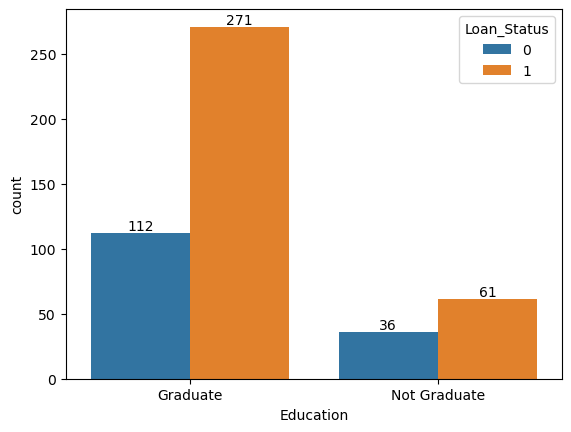

In [23]:
ax=sns.countplot(loan, x = 'Education', hue='Loan_Status')
for container in ax.containers:
    ax.bar_label(container)

The loan is approved in most cases if the person is a Graduate.

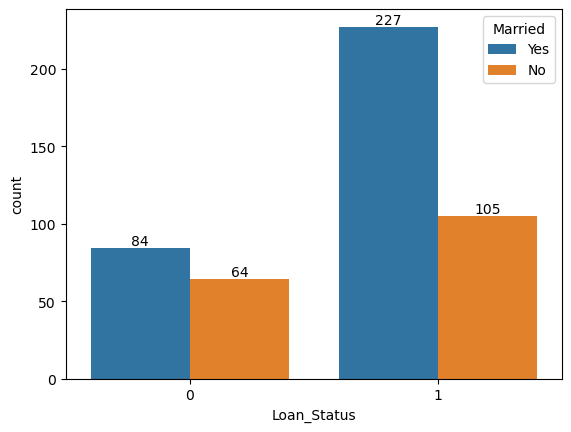

In [25]:
ax=sns.countplot(loan, x = 'Loan_Status', hue='Married')
for container in ax.containers:
    ax.bar_label(container)

Out of those whose loan is approved most of them are married. Logically thinking, a married person has the cushion of double income. So the loan would be safer than for an unmarried person. 

## Feature Engineering

#### Converting Values in Categorical columns to Numeric Values

Note that in certain columns (categorical ones) the values are in string format. We cannot build a model with string inputs, so we have to convert these values to numeric. First finding out what categories are there of these categorical variables.

In [29]:
loan['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [30]:
loan['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [57]:
loan.replace({'Gender':{'Male':1,'Female':0},
                     'Married':{'Yes':1,'No':0},
                     'Education':{'Graduate':1,'Not Graduate':0},
                     'Self_Employed':{'Yes':1,'No':0},
                     'Property_Area':{'Rural':0,'Urban':2,'Semiurban':1}},inplace=True)

In [50]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1


## Building the Model

#### Splitting the Target and Features

In [58]:
X = loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan['Loan_Status']

In [59]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2
5,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0
610,1.0,1.0,4,1,0.0,4106,0.0,40.0,180.0,1.0,0
611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2
612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2


#### Train Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [61]:
print(X.shape, X_train.shape,X_test.shape,)

(480, 11) (432, 11) (48, 11)


#### Training the model - using Support Vector Machine Model

In [62]:
classifier = svm.SVC(kernel='linear')

In [63]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

#### Model Evaluation

In [68]:
#Accuracy score on training data
X_train_accuracy = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_accuracy,y_train)

In [69]:
print(f'The accuracy score for training data is {training_data_accuracy}')

The accuracy score for training data is 0.7986111111111112


In [70]:
#Accuracy score on test data
X_test_accuracy = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_accuracy,y_test)

In [71]:
print(f'The accuracy score for test data is {test_data_accuracy}')

The accuracy score for test data is 0.8333333333333334


The two accuracy scores are pretty close so the model is not overfitted

## Conclusion

We have used loan status data from Kaggle and we wanted to build a model with several features so as to be able to predict whether a loan will be approved or not. Support Vector Machine model (a Classification Model) has been used here. The model has a pretty good accuracy score.